In [50]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10000000)

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Climatic database exploration
* Convert index to timestamp
* drop precipitation

In [2]:
raw1 = pd.read_csv ("../datasets/ClimateData1hr2018.csv", header=0)
raw1.head()

,timestamp,temp_celsius,pression,precipitation,windspeed_mps
0,2018-01-01 00:00:00-02,23,1010.5,0.0,1.5
1,2018-01-01 01:00:00-02,23,1010.2,0.0,1.4
2,2018-01-01 02:00:00-02,23,1009.9,0.0,1.0
3,2018-01-01 03:00:00-02,23,1009.4,0.0,0.5
4,2018-01-01 04:00:00-02,23,1008.8,0.0,0.4


In [3]:
raw1.describe()
# expected count = 24*365 = 8760

,temp_celsius,pression,precipitation,windspeed_mps
count,8758.000000,8758.000000,8758.000000,8758.000000
mean,20.968486,1015.909420,0.109192,3.813028
std,3.847636,5.256797,0.446469,1.863582
min,9.000000,999.300000,0.000000,0.000000
25%,18.000000,1012.200000,0.000000,2.400000
50%,21.000000,1015.700000,0.000000,3.600000
75%,24.000000,1019.500000,0.000000,5.000000
max,32.000000,1030.400000,8.200000,11.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71aa6494a8>,
      dtype=object)

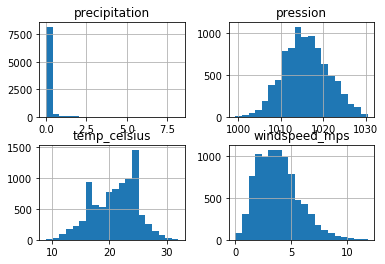

In [4]:
raw1.hist(bins=20)

In [5]:
raw1['timestamp'] = pd.to_datetime (raw1['timestamp'], utc=True)
raw1 = raw1.set_index(raw1.timestamp)
raw1 = raw1.drop ('timestamp', axis=1)

raw1 = raw1.set_index(raw1.index.tz_convert(None) + pd.offsets.Hour(-2)) # correct to brazilian timezone

In [6]:
## automatic outlier remotion (does not work!)
#IQR = raw1.quantile(q=0.75) - raw1.quantile(q=0.25)
#test = raw1[(raw1>=(raw1.quantile(q=0.25)-1.5*IQR)) & raw1<=(raw1.quantile(q=0.75)+1.5*IQR)]
#test.count()

In [7]:
filtered1 = raw1.drop('precipitation', axis=1) # não é possível confiar nos valores de precipitação dessa base de dados

In [8]:
filtered1.head()

,temp_celsius,pression,windspeed_mps
timestamp,,,
2018-01-01 00:00:00,23,1010.5,1.5
2018-01-01 01:00:00,23,1010.2,1.4
2018-01-01 02:00:00,23,1009.9,1.0
2018-01-01 03:00:00,23,1009.4,0.5
2018-01-01 04:00:00,23,1008.8,0.4


# Electrical database exploration
* Convert index to timestamp
* Resample by hour
* Calculates load factor

In [9]:
raw2 = pd.read_csv ("../datasets/ElectricData5min2018.csv", header=0)
raw2.head()

,timestamp,voltage,p3,cosphi
0,2018-01-01 00:00:00,13.881724,70.005337,0.937582
1,2018-01-01 00:05:00,13.904519,68.660572,0.936677
2,2018-01-01 00:10:00,13.890323,66.789727,0.941584
3,2018-01-01 00:15:00,13.844900,71.042258,0.941016
4,2018-01-01 00:20:00,13.826288,72.451916,0.936077


In [10]:
raw2.describe()

,voltage,p3,cosphi
count,100655.000000,100655.000000,100655.000000
mean,13.810922,147.935661,0.960663
std,0.075470,127.708889,0.117920
min,9.228800,-16.465568,-0.996650
25%,13.758648,65.729712,0.966689
50%,13.812909,83.261068,0.977767
75%,13.865469,209.196288,0.988708
max,14.251907,754.551538,0.999849


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71aa20b128>,
      dtype=object)

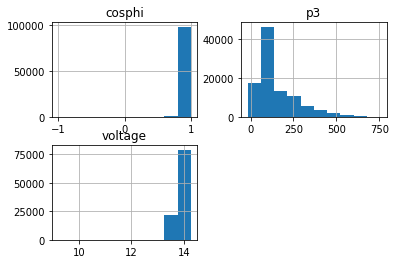

In [11]:
raw2.hist()

In [12]:
raw2 = raw2[(raw2['p3']>10)] # outlier automatic remotion

In [13]:
raw2['timestamp'] = pd.to_datetime (raw2['timestamp']) # already was in brazilian timezone
raw2 = raw2.set_index(raw2.timestamp)
raw2 = raw2.drop ('timestamp', axis=1)

In [14]:
# Resample
resampled2 = raw2.resample('H').agg({
    'voltage': ['mean', 'count'],
    'p3': ['mean', 'max'],
    'cosphi': ['mean']
})

resampled2.columns = resampled2.columns.map('_'.join)
resampled2 = resampled2.dropna()
#resampled2.plot(subplots=True)

resampled2


,voltage_mean,voltage_count,p3_mean,p3_max,cosphi_mean
timestamp,,,,,
2018-01-01 00:00:00,13.819525,12,68.987584,72.979614,0.943439
2018-01-01 01:00:00,13.723727,12,68.466381,72.401109,0.950982
2018-01-01 02:00:00,13.764526,12,68.889280,75.105187,0.951596
2018-01-01 03:00:00,13.810144,12,69.693009,73.567126,0.948811
2018-01-01 04:00:00,13.851163,12,69.340223,74.363869,0.939526
2018-01-01 05:00:00,13.870747,12,68.761493,71.385435,0.940708
2018-01-01 06:00:00,13.885085,12,58.777086,67.542822,0.956023
2018-01-01 07:00:00,13.913633,12,46.751823,55.018247,0.954011
2018-01-01 08:00:00,13.768172,12,38.389900,47.612229,0.942879


In [15]:
filtered2 = resampled2[(resampled2['voltage_count'] == 12)]
filtered2 = filtered2.drop('voltage_count', axis=1)

In [16]:
filtered2['load_factor'] = filtered2['p3_mean']/filtered2['p3_max']

In [17]:
filtered2 = filtered2.drop('p3_max', axis=1)

# Data integration

In [20]:
merged = pd.merge (filtered1, filtered2,how='inner', left_index=True, right_index=True)

In [21]:
## Season dummy variables
merged['is_summer'] = merged.index<='2018-03-20 03:00:00' 
merged['is_fall'] = (merged.index>'2018-03-20 00:00:00') & (merged.index<='2018-06-21 00:00:00')
merged['is_winter'] = (merged.index>'2018-06-21 00:00:00') & (merged.index<='2018-09-22 00:00:00')
merged['is_spring'] = (merged.index>'2018-09-22 00:00:00') & (merged.index<='2018-12-21 00:00:00')
merged['is_summer'] = merged['is_summer'] | (merged.index>'2018-12-21 03:00:00')

merged['is_summer'] = merged['is_summer'].apply(lambda x: 1 if x==True else 0)
merged['is_fall'] = merged['is_fall'].apply(lambda x: 1 if x==True else 0)
merged['is_winter'] = merged['is_winter'].apply(lambda x: 1 if x==True else 0)
merged['is_spring'] = merged['is_spring'].apply(lambda x: 1 if x==True else 0)

In [32]:
## Bussines day dummy variable


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f71a7ed2940>,
      dtype=object)

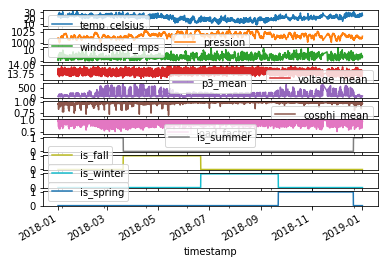

In [35]:
merged.plot(subplots=True)

In [36]:
merged.describe()
# sobraram 8067 pontos, de potenciais 8760

,temp_celsius,pression,windspeed_mps,voltage_mean,p3_mean,cosphi_mean,load_factor,is_summer,is_fall,is_winter,is_spring
count,8067.000000,8067.000000,8067.000000,8067.000000,8067.000000,8067.000000,8067.000000,8067.000000,8067.000000,8067.000000,8067.000000
mean,20.883600,1015.882769,3.767968,13.811778,152.721151,0.974863,0.901875,0.242221,0.265526,0.262799,0.229453
std,3.826022,5.208841,1.843107,0.062017,125.906904,0.021868,0.072805,0.428454,0.441640,0.440181,0.420507
min,9.000000,999.300000,0.000000,13.603576,13.904076,0.702013,0.440432,0.000000,0.000000,0.000000,0.000000
25%,18.000000,1012.300000,2.300000,13.766456,67.326720,0.968351,0.870865,0.000000,0.000000,0.000000,0.000000
50%,21.000000,1015.600000,3.600000,13.812545,86.029867,0.977961,0.925593,0.000000,0.000000,0.000000,0.000000
75%,24.000000,1019.400000,4.900000,13.857794,213.164561,0.988418,0.954891,0.000000,1.000000,1.000000,0.000000
max,32.000000,1030.400000,11.800000,13.995569,732.414639,0.999565,0.992561,1.000000,1.000000,1.000000,1.000000


In [45]:
## Remove fins de semana
# Create an index of just the date portion of your index (this is the slow step)
dfDays = pd.to_datetime(merged.index.date)

# Create a range of business days over that period
dfBdays = pd.bdate_range(start=merged.index[0].date(), end=merged.index[-1].date())

#Filter the series to just those days contained in the business day range.
merged['isBday'] = dfDays.isin(dfBdays)

In [53]:
## Remove dias úteis não letivos
    ## MEU CALENDARIO ESTAVA ERRADO

# Janeiro: inteiro
merged.loc[merged.index.month == 1,'isBday'] = False

# Fevereiro: até 17
merged.loc[(merged.index.month == 2) & (merged.index.day <= 17),'isBday'] = False

# Março: 4, 5, 6, 23
merged.loc[(merged.index.month == 3) & (merged.index.day == 4),'isBday'] = False
merged.loc[(merged.index.month == 3) & (merged.index.day == 5),'isBday'] = False
merged.loc[(merged.index.month == 3) & (merged.index.day == 6),'isBday'] = False
merged.loc[(merged.index.month == 3) & (merged.index.day == 23),'isBday'] = False

merged['isBday'] = merged['isBday'].apply(lambda x: 1 if x==True else 0)

In [55]:
merged.to_csv('../datasets/2018merging1h.csv')